In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib as mpl
import seaborn as sns
from collections import Counter
import missingno as msno
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [4]:
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [7]:
print ("Total number of dimensions : %d" %(train.shape[1]))
print ("Number of rows in training set : %d" %train.shape[0])
print ("Number of rows in test set : %d" %test.shape[0])

Total number of dimensions : 59
Number of rows in training set : 595212
Number of rows in test set : 892816


In [8]:
print ("Total NaN in train data : %d" %train.isnull().sum().sum())
print ("Total NaN in test data : %d" %test.isnull().sum().sum())
print ("Dataset doesn't have NaN but -1 as missing values")

Total NaN in train data : 0
Total NaN in test data : 0
Dataset doesn't have NaN but -1 as missing values


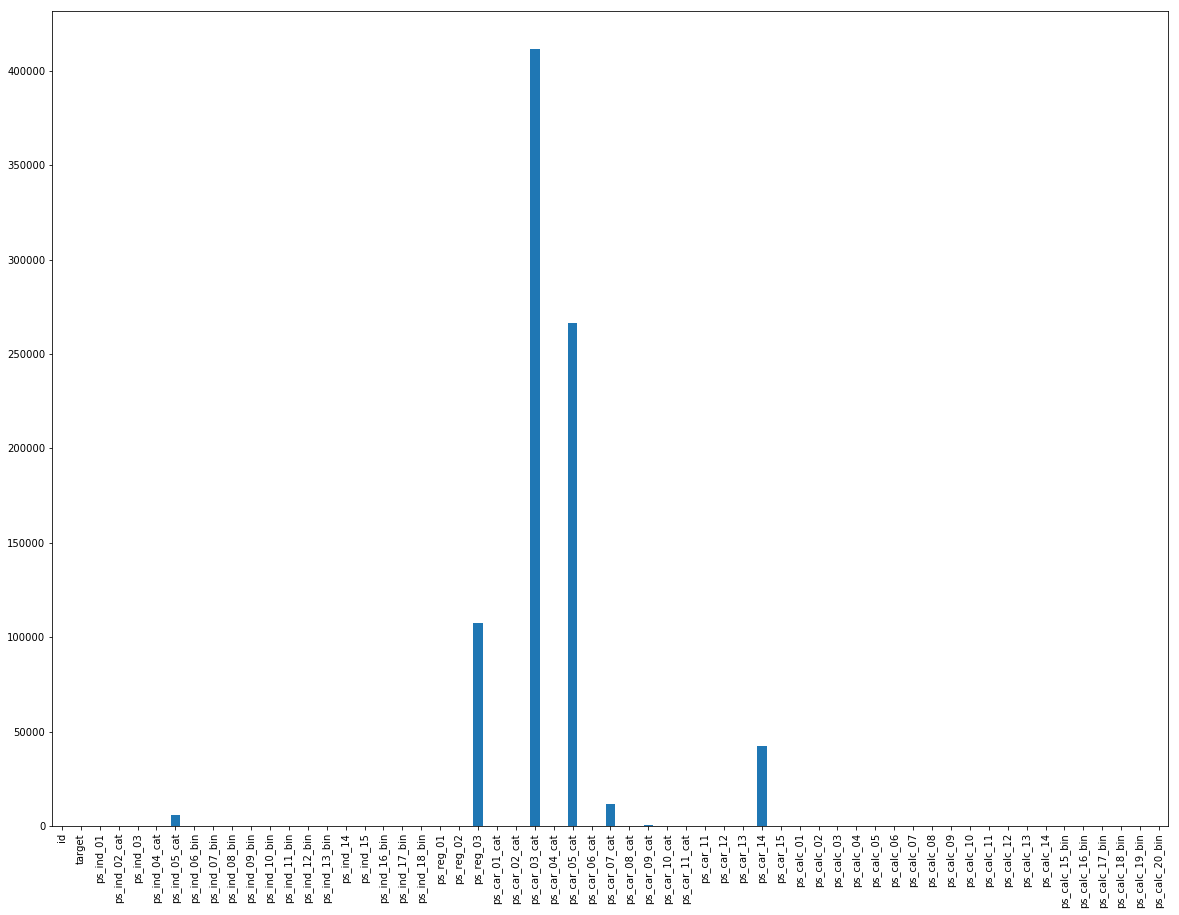

In [9]:
train_missing_values = (train == -1).sum()
plt.rcParams['figure.figsize'] = (20,15)
train_missing_values.plot.bar()
plt.show()

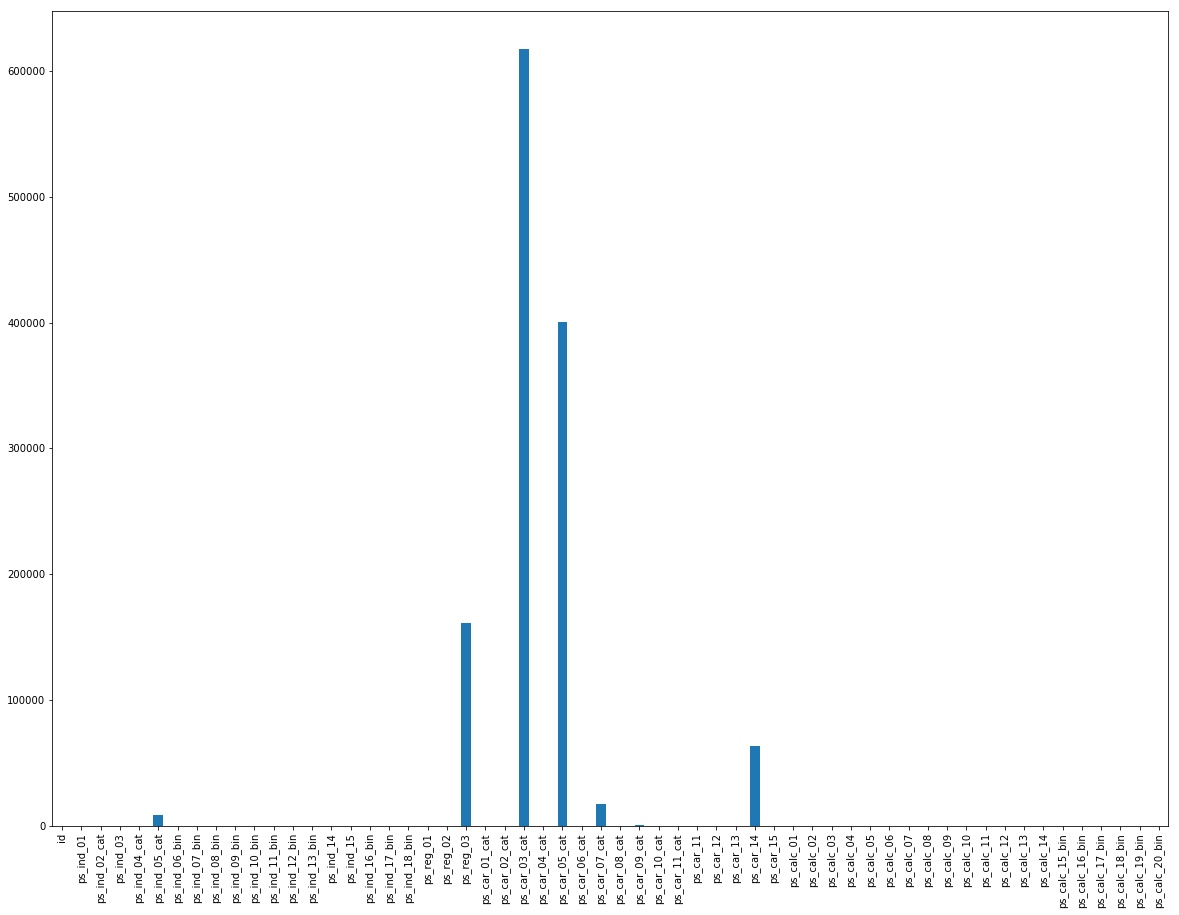

In [10]:
test_missing_values = (test == -1).sum()
plt.rcParams['figure.figsize'] = (20,15)
test_missing_values.plot.bar()
plt.show()

No people who claimed insurance: 21694 (3.644752%) 
People who did not claim insurance: 573518 (96.355248%)


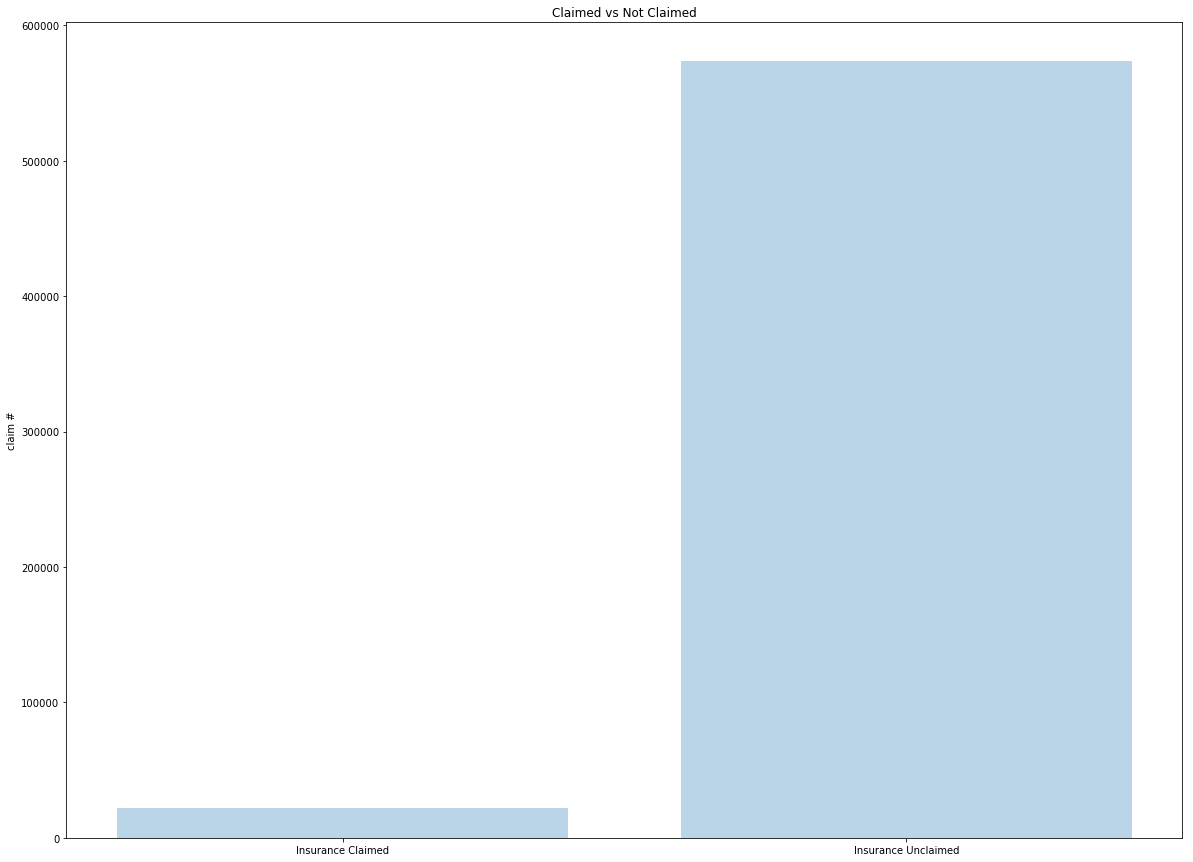

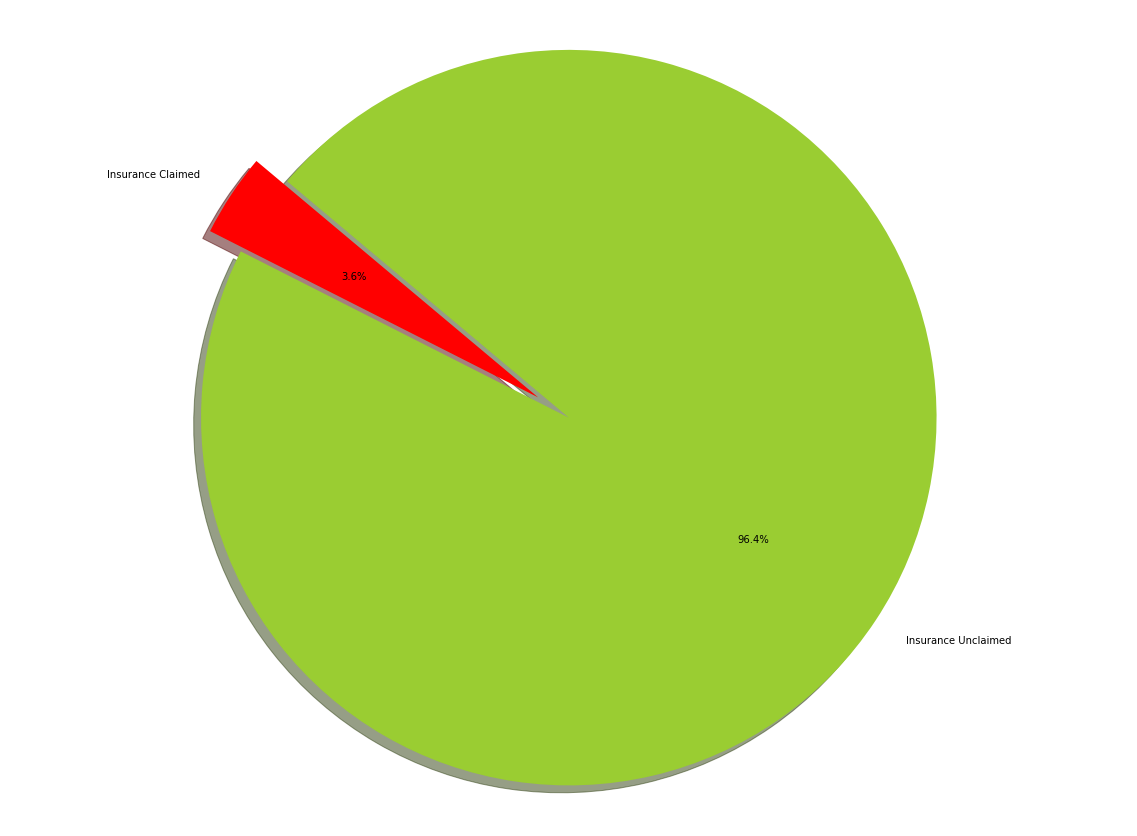

In [11]:
print ("No people who claimed insurance: %d (%f%%) \nPeople who did not claim insurance: %d (%f%%)" %(train['target'].sum(), (train['target'].sum()*100.0)/train.shape[0], train.shape[0] - train['target'].sum(), ((train.shape[0] - train['target'].sum())*100.0)/train.shape[0]))


objects = ('Insurance Claimed', 'Insurance Unclaimed')
y_pos = np.arange(len(objects))
performance = [train['target'].sum(), train.shape[0] - train['target'].sum()]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('claim #')
plt.title('Claimed vs Not Claimed')
plt.show()

objects = ('Insurance Claimed', 'Insurance Unclaimed')
colors = ['red', 'yellowgreen']
sizes = [(train['target'].sum()*100.0)/train.shape[0], ((train.shape[0] - train['target'].sum())*100.0)/train.shape[0]]
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [12]:
uniques = Counter()
for col in train.columns:
    uniques[col] = len(np.sort(train[col].unique()))
binary_columns = [ col for col , val in uniques.items() if(val==2)]

#List of binary columns
binary_columns

['target',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_08_cat',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [13]:
train_float = train.select_dtypes(include=['float64'])

We see that columns ps_car_13 and ps_car_12 have high correlation, as well as columns ps_reg_02, ps_reg_03


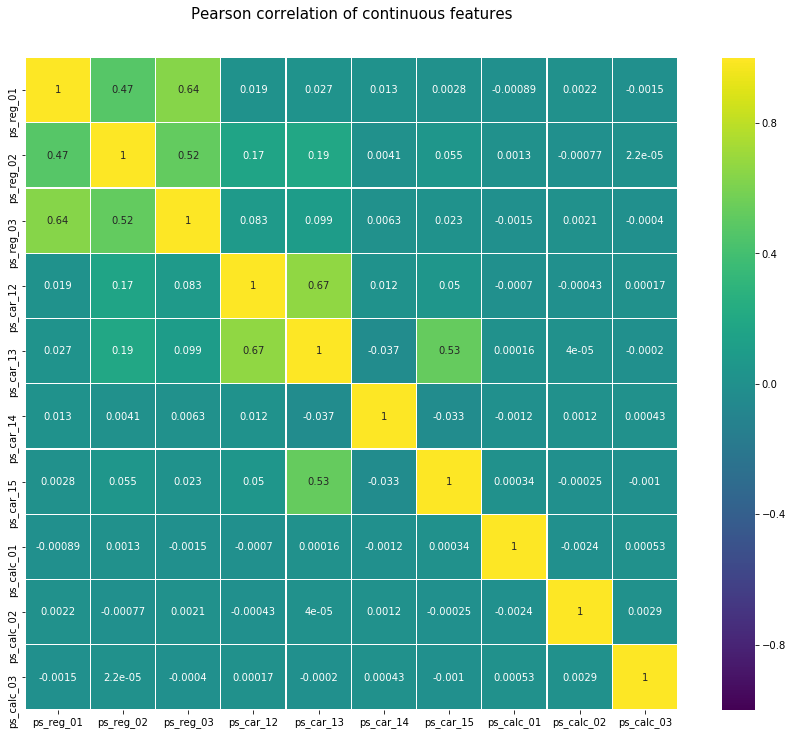

In [23]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

print("We see that columns ps_car_13 and ps_car_12 have high correlation, as well as columns ps_reg_02, ps_reg_03")

In [17]:
# input NaN instead of -1 for missing values
train = train.replace(-1, np.NaN)

# drop id column
train = train.drop(['id'],axis=1)

In [21]:
# missing values
mis = train.isnull().sum()
print(mis[np.argsort(mis)[::-1]][:15])
print("\nWe can drop the first 3 columns as they have really high number of missing values and they will not add anything worthwhile")

ps_car_03_cat    411231
ps_car_05_cat    266551
ps_reg_03        107772
ps_car_14         42620
ps_car_07_cat     11489
ps_ind_05_cat      5809
ps_car_09_cat       569
ps_ind_02_cat       216
ps_car_01_cat       107
ps_ind_04_cat        83
ps_car_11             5
ps_car_02_cat         5
ps_car_12             1
ps_ind_17_bin         0
ps_reg_02             0
dtype: int64

We can drop the first 3 columns as they have really high number of missing values and they will not add anything worthwhile


In [22]:
# drop columns with high missing values
train = train.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'],axis=1)